In [2]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from scipy.stats import norm

In [3]:
headers = ['mee1', 'mee2', 'mee3', 'pnc1', 'pnc2', 'pnc3', 'qtn1', 'qtn2', 'qtn3']

In [4]:
# Gather data paths
data_path = './data/'
data_batches = pd.Series(os.listdir(data_path)).apply(lambda x: os.path.join(data_path, x))
is_dir = (data_batches.apply(os.path.isdir))
data_batches = data_batches[is_dir]
print(data_batches)

0    ./data/data_5
1    ./data/data_6
2    ./data/data_1
4    ./data/data_4
5    ./data/data_0
7    ./data/data_2
8    ./data/data_7
9    ./data/data_3
dtype: object


In [5]:
# Collate data
proper_element_list = []
basename_list = []
for batch in data_batches:
    parents = [os.path.join(batch, parent) for parent in os.listdir(batch)]
    for parent in parents:
        fragments = [os.path.join(parent, fragment) for fragment in os.listdir(parent)]
        for fragment in fragments:
            basename = os.path.basename(fragment)
            df = pd.read_csv(fragment)
            proper_element_list.append(df['r'])
            basename_list.append(basename)

proper_element_array = np.array(proper_element_list)
basename_array = np.array(basename_list)

proper_element_array.shape

(2960, 9)

In [6]:
# Dropping nan
nan_mask = np.isnan(proper_element_array)
row_mask = np.any(nan_mask, axis=1)

clean_proper_element_array = proper_element_array[~row_mask]
clean_proper_element_array.shape

(2898, 9)

In [46]:
def data_summary(data: np.ndarray, scaler_function, ax_raw, ax_trn, ax_box):

    data = data.reshape(-1, 1)

    # === Raw data === 

    # Numeric summary
    quantiles = np.linspace(0, 100, 5)
    summary = np.percentile(data, quantiles)
    # for i in range(5):
    #     print(f"  Q{i+1} = {summary[i]: >.5f}")

    mean = np.mean(data)
    std  = np.std(data)

    # print(f"Mean = {mean:.5f}")
    # print(f"St.D = {std:.5f}")

    # Visual summary
    n = int(np.sqrt(len(data)))
    xs = np.linspace(mean - 5*std, mean + 5*std, 100)
    normal = norm.pdf(x=xs, loc=mean, scale=std)

    ax_raw.hist(data, density=True, bins=n)
    ax_raw.plot(xs, normal)

    ax_box.boxplot(data)

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # IQR Bounds
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR

    # 2 Sigma Bounds
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std

    outliers = (data < lower_bound) | (data > upper_bound)
    n_outliers = np.sum(outliers)
    total_points = len(data)
    outlier_percentage = n_outliers / total_points
    print(f"{n_outliers = }\n{outlier_percentage = :.2f}\n")

    # === Transformed data ===

    scaler = scaler_function.fit(data)
    transformed_data = scaler.transform(data)

    # Numeric summary
    summary = np.percentile(transformed_data, quantiles)
    # for i in range(5):
    #     print(f"  Q{i+1} = {summary[i]: >.5f}")

    mean = np.mean(transformed_data)
    std  = np.std(transformed_data)

    # print(f"Mean = {mean:.5f}")
    # print(f"St.D = {std:.5f}")

    # Visual summary
    xs = np.linspace(mean - 5*std, mean + 5*std, 100)
    normal = norm.pdf(x=xs, loc=mean, scale=std)

    ax_trn.hist(transformed_data, density=True, bins=n)
    ax_trn.plot(xs, normal)

n_outliers = 109
outlier_percentage = 0.04

n_outliers = 352
outlier_percentage = 0.12

n_outliers = 10
outlier_percentage = 0.00

n_outliers = 102
outlier_percentage = 0.04

n_outliers = 352
outlier_percentage = 0.12

n_outliers = 10
outlier_percentage = 0.00

n_outliers = 319
outlier_percentage = 0.11

n_outliers = 352
outlier_percentage = 0.12

n_outliers = 27
outlier_percentage = 0.01



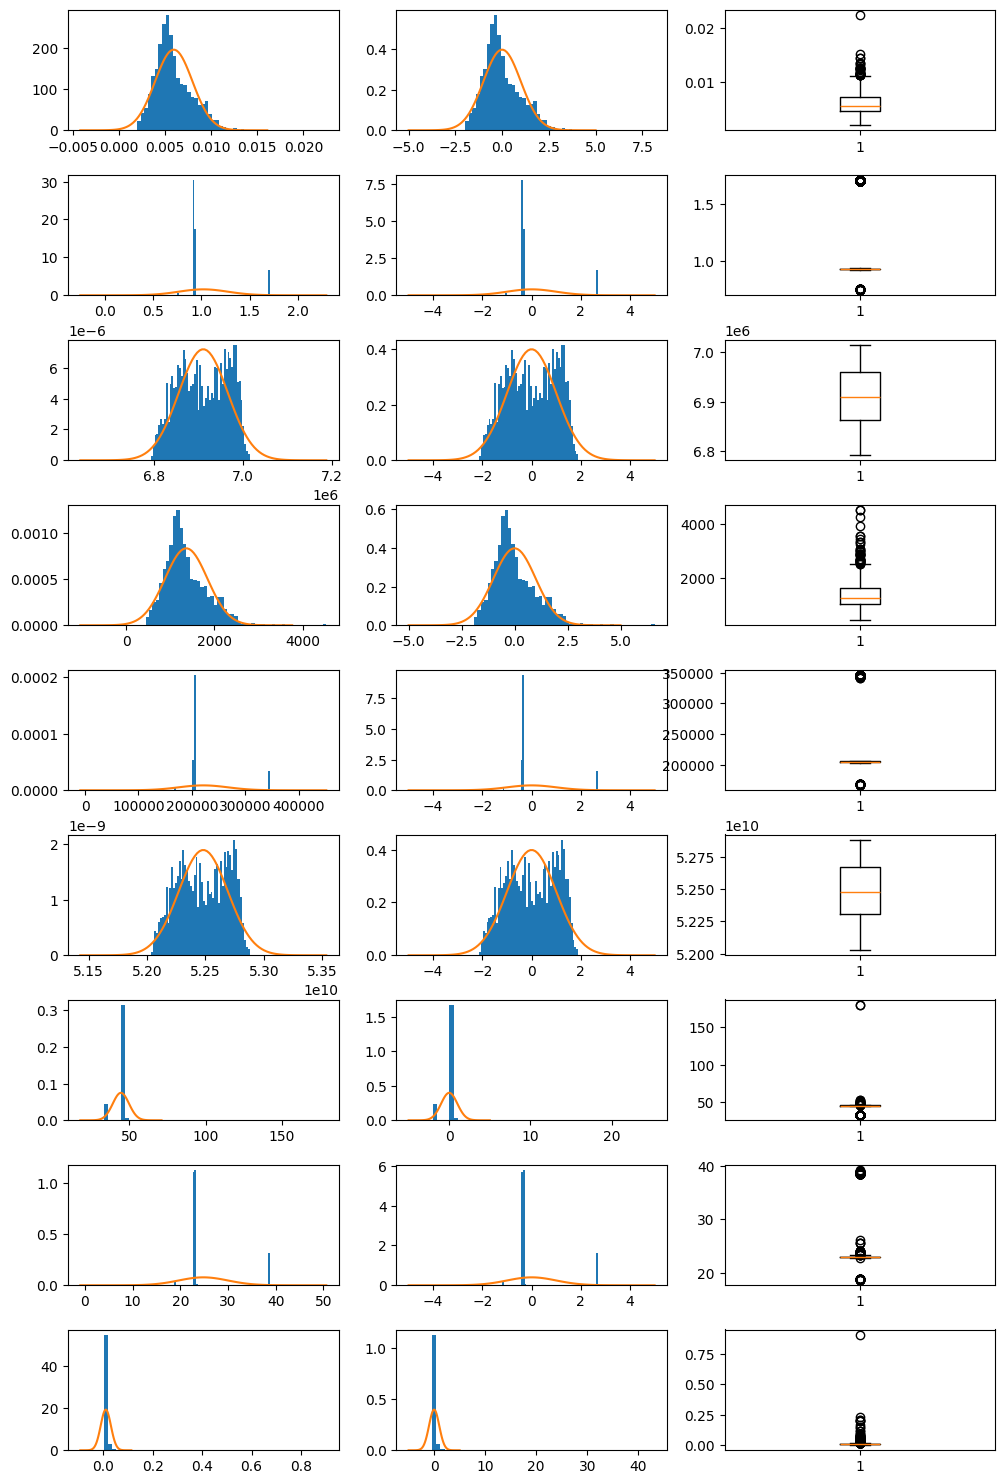

In [47]:
# Element summaries
fig, axs = plt.subplots(9, 3, figsize=(10,15))
fig.tight_layout()
for i in range(9):
    data = clean_proper_element_array[:, i]
    data_summary(data, preprocessing.StandardScaler(), axs[i, 0], axs[i, 1], axs[i, 2])

### MEE elements
 - $(h,k) = e_p$ roughly normal
 - $(p,q) = i_p$ min-max from $[0,2\pi)$
 - $a_p$ = multimodal normal

### PNC elements
Follows MEE elements, but is scaled with different factor

### QTN elements
 - $qtn_(0,3)$ ?
 - $qtn_(1,2)$ ?
 - $e_p$ roughly normal? proper element fitting is different, giving a different
   distribution of eccentricities. remove outliers?

In [ ]:
scalers = [
    preprocessing.RobustScaler(),
    preprocessing.MinMaxScaler(),
    preprocessing.RobustScaler(),
]

n_outliers = 109
outlier_percentage = 0.04

n_outliers = 352
outlier_percentage = 0.12

n_outliers = 10
outlier_percentage = 0.00



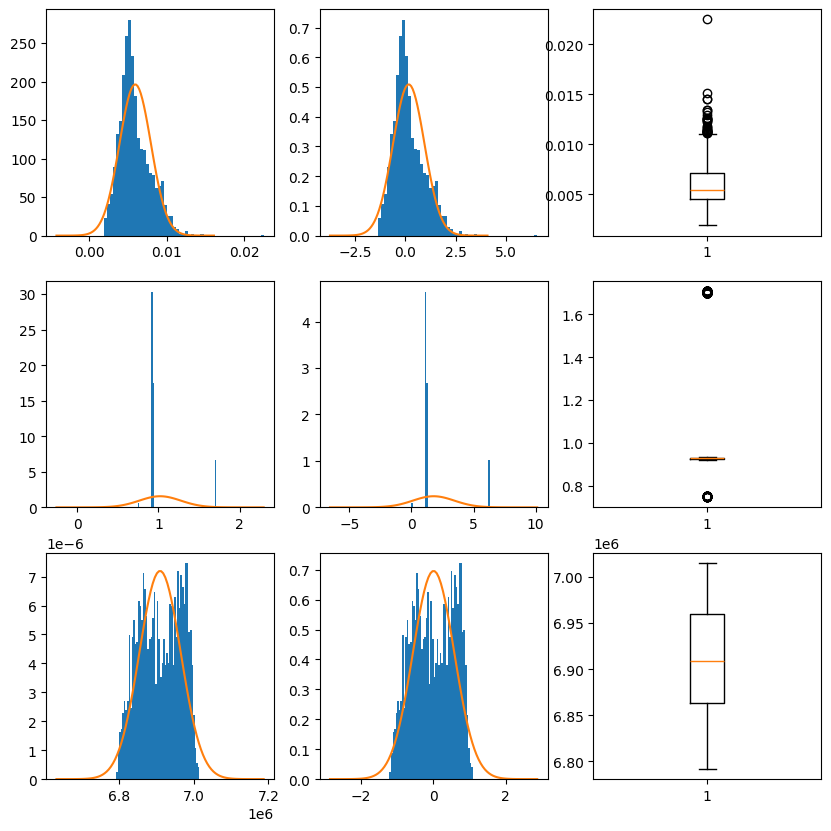

In [49]:
fig, axs = plt.subplots(3,3, figsize=(10,10))
for i in range(3):
    scaler = scalers[i]
    data = clean_proper_element_array[:, i]
    data_summary(data, scaler, axs[i, 0], axs[i, 1], axs[i, 2])